In [1]:
# Dependencies
%matplotlib notebook
import matplotlib
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import numpy as np

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [3]:
engine = create_engine("sqlite:///Downloads/hawaii.sqlite", echo=False)

In [4]:
 # Reflect Database
Base = automap_base()
Base.prepare(engine, reflect=True)

In [5]:
# Display classes
Base.classes.keys()

['measurement', 'station']

In [6]:
# Save reference to classes
Station = Base.classes.station
Measurement = Base.classes.measurement

In [7]:
# Session link from Python to database
session = Session(engine)

## Precipitation Analysis

In [8]:
# Query to retrieve the last 12 months of precipitation data
max_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

max_date = max_date[0]

# Calculate date 1 year from max date
date_year_ago = pd.datetime.strptime(max_date, "%Y-%m-%d") - dt.timedelta(days=365)

# Query to get date and precipitation scores
precip_scores = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= date_year_ago).order_by(Measurement.date).all()

# Save query results to pandas dataframe
precip_df = pd.DataFrame(precip_scores, columns=['date', 'precipitation'])

# Update datatype to datetime
precip_df['date'] = pd.to_datetime(precip_df['date'], format='%Y-%m-%d')

# Set index to date
precip_df.set_index('date', inplace=True)

# Sort by date
precip_df = precip_df.sort_values(by='date',ascending=True)

<IPython.core.display.Javascript object>


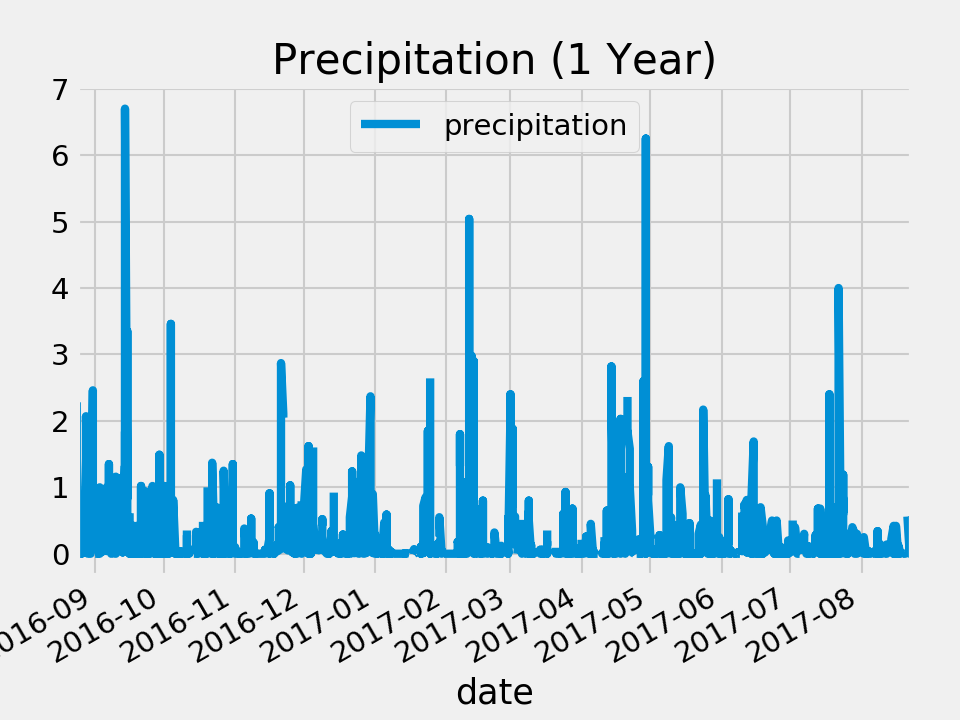

In [9]:
# Plot data using Pandas and Matplotlib
precip_df.plot(title="Precipitation (1 Year)")
plt.legend(loc='upper center')
#plt.savefig("Pictures/Precipitation.png")
plt.show()

In [10]:
# Print summary statistics of precipitation data
precip_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [11]:
# Query to get total number of stations
total_stations = session.query(Measurement.station).distinct().count()
print(f"Total Stations: {total_stations} ")

Total Stations: 9 


In [12]:
# Query to get most active stations
active_stations = session.query(Measurement.station,func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
print(f"Most Active Stations")
active_stations

Most Active Stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [13]:
# Query to get the most active station
most_active=active_stations[0][0]
print(f"Most Active Station: {most_active}")

Most Active Station: USC00519281


<IPython.core.display.Javascript object>


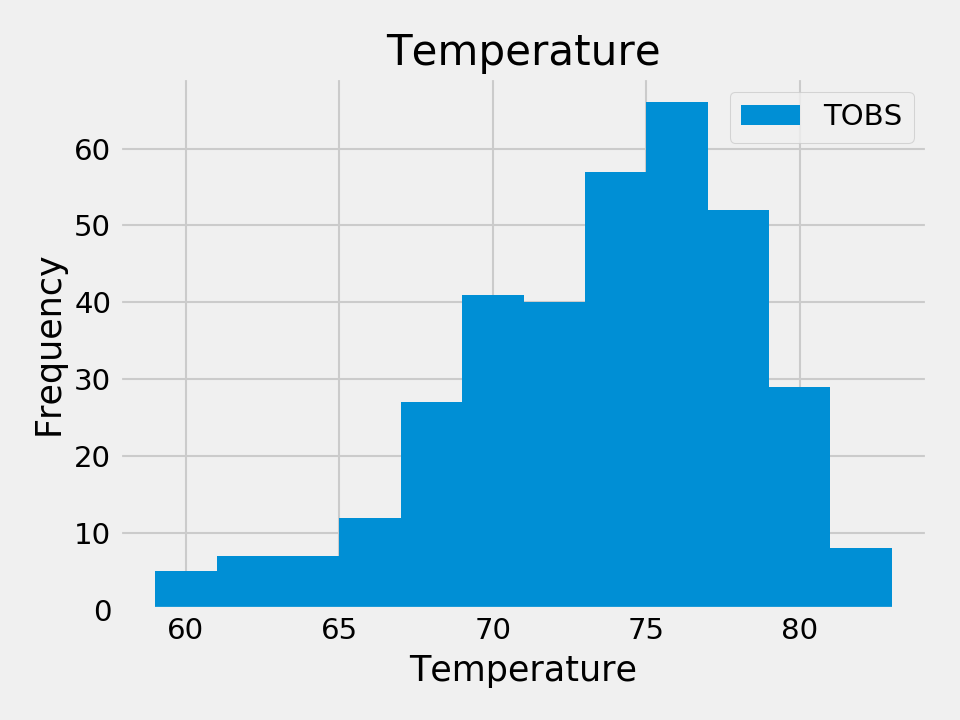

In [14]:
# Query to get station with highest number of observations
tobs_data = session.query(Measurement.tobs).\
filter(Measurement.date >= date_year_ago).\
filter(Measurement.station == "USC00519281").order_by(Measurement.date).all()

# Save query results to pandas dataframe
tobs_data_df = pd.DataFrame(tobs_data, columns=["TOBS"])

# Plot histogram
tobs_data_df.plot.hist(bins=12, title="Temperature")
plt.xlabel("Temperature")
plt.legend(loc="upper right")
plt.tight_layout()
#plt.savefig("Pictures/temperature.png")
plt.show()

## Temperature Analysis

In [15]:
# Calculate Minimum, Maximum  and Average temperatures
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
    Returns:
        TMIN, TAVG, and TMAX"""
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# Print Min, Max, Avg temps for my trip
trip = calc_temps('2017-08-09','2017-08-16')
print (trip)

[(70.0, 78.36363636363636, 84.0)]


<IPython.core.display.Javascript object>


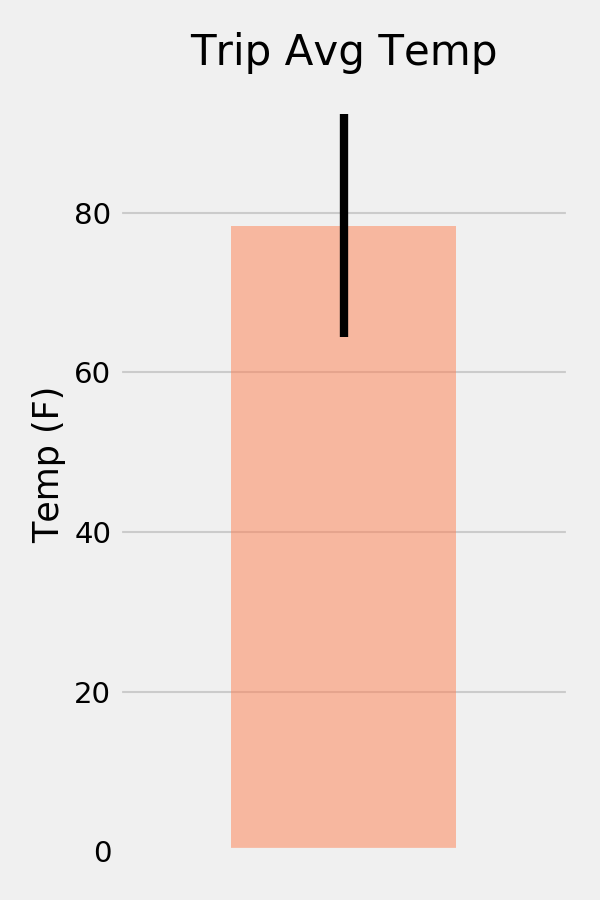

In [16]:
# Create dataframe with the calculated trip min, avg, and max temps
trip_temps_df = pd.DataFrame(trip, columns=['tmin', 'tavg', 'tmax'])

# Plot bar chart with query results
trip_temps_df.plot.bar(y='tavg', yerr=(trip_temps_df['tmax'] - trip_temps_df['tmin']), title='Trip Avg Temp', color='coral', alpha=0.5, figsize=(4,6))
plt.xticks(np.arange(1, 1.0))
plt.ylabel("Temp (F)")
plt.tight_layout()
plt.gca().legend_.remove()
#plt.savefig("Pictures/TripAvgTemp.png")
plt.show()